# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

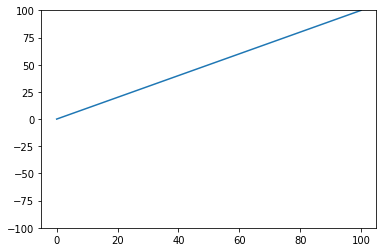

10.0


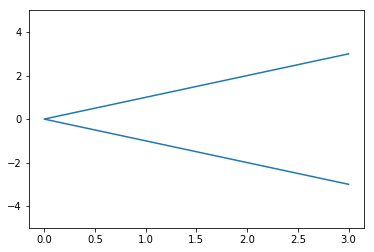

In [103]:
# NOT FINISHED

import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

x1 = np.linspace(0,100,101, endpoint = True)
y1 = x1
plt.plot(x1,y1)
plt.ylim(-100,100)
plt.show()

print(sqrt(num))

x2 = [3,2,1,0,1,2,3]
y2 = [3,2,1,0,-1,-2,-3]

plt.plot(x2,y2)
plt.ylim(-5,5)
plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

They don't map one output to an input

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Only relation 2, because all of the others have multiple outputs per one input.

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

m: Input is in 3 dimensions, output in 3 dimensions
n: Input is in 4 dimensions, output is in 2 dimensions

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

Yes:
o(x1,x2,x3)  = (x1+x2, x1+x3, x2+x3, x1*x2)

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

In [54]:
p_ihat = np.array([[1],[-1]])
p_jhat = np.array([[3],[2]])
p_transformation = np.hstack((p_ihat,p_jhat))
print(p_transformation)

q_ihat = np.array([[4],[-1],[5]])
q_jhat = np.array([[1],[2],[1]])
q_khat = np.array([[2],[3],[-2]])
q_transformation = np.hstack((q_ihat,q_jhat,q_khat))
print(q_transformation)

[[ 1  3]
 [-1  2]]
[[ 4  1  2]
 [-1  2  3]
 [ 5  1 -2]]


## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [57]:
p_test = np.array([[1,2], [2,3]])

# Defining function to calculate vectors after applying p equations
def p(x1,x2):
  x1_final = x1+(3*x2)
  x2_final = (2*x2)-x1
  return np.array([[x1_final],[x2_final]])

# Printing results of multiplying and applying the p equations

print('p_test multiplied by p_transformation:')
print(np.dot(p_transformation,p_test))

p_result = np.hstack((p(1,2),p(2,3)))
print('p_test from functions:')
print(p_result)

# Defining function to calculate vectors after applying q equations

q_test = np.array([[1,2,3],[4,5,6],[7,8,9]])

def q(x1,x2,x3):
  x1_final = 4*x1+x2+2*x3
  x2_final = 2*x2-x1+3*x3
  x3_final = 5*x1-2*x3+x2
  return np.array([[x1_final],[x2_final],[x3_final]])

# Printing results

print('q_test multiplied by q_transformation:')
print(np.dot(q_transformation,q_test))

q_result = np.hstack((q(1,4,7),q(2,5,8),q(3,6,9)))
print('q_test from functions:')
print(q_result)

p_test multiplied by p_transformation:
[[ 7 11]
 [ 3  4]]
p_test from functions:
[[ 7 11]
 [ 3  4]]
q_test multiplied by q_transformation:
[[22 29 36]
 [28 32 36]
 [-5 -1  3]]
q_test from functions:
[[22 29 36]
 [28 32 36]
 [-5 -1  3]]


# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

An Eigenvector is a vector that is has the same span after a transformation as it did before the transformation. An Eigenvalue is the scalar you would need to multiply the vector by before the transformation to get the vector after the transformation.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

You are at a high risk of overfitting a model to your data. Also, you may be doing a lot of unnecessary computation which could be costly in dollars/time.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

You should have at least 5 times as many observations as parameters.

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [90]:
import pandas as pd

df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')
df.head()
# My Y variable is species, everything else is X

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [91]:
# Subtracting mean from X columns
X_columns = ['sepal_length','sepal_width','petal_length','petal_width']

X = df.drop(columns = ['species'])
Z = X
for column in X_columns:
  Z[column] = Z[column]-Z[column].mean()

Z.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.743333,0.446,-2.358667,-0.998667
1,-0.943333,-0.054,-2.358667,-0.998667
2,-1.143333,0.146,-2.458667,-0.998667
3,-1.243333,0.046,-2.258667,-0.998667
4,-0.843333,0.546,-2.358667,-0.998667


In [92]:
# Dividing X columns by std dev

for column in X_columns:
  Z[column] = Z[column]/np.std(Z[column])
  
print(Z.head())
Z.describe()


   sepal_length  sepal_width  petal_length  petal_width
0     -0.900681     1.032057     -1.341272    -1.312977
1     -1.143017    -0.124958     -1.341272    -1.312977
2     -1.385353     0.337848     -1.398138    -1.312977
3     -1.506521     0.106445     -1.284407    -1.312977
4     -1.021849     1.263460     -1.341272    -1.312977


,sepal_length,sepal_width,petal_length,petal_width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.652382e-15,-1.855090e-15,-1.683838e-15,-1.590580e-15
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


In [93]:
print(Z.head())
Z.cov()

   sepal_length  sepal_width  petal_length  petal_width
0     -0.900681     1.032057     -1.341272    -1.312977
1     -1.143017    -0.124958     -1.341272    -1.312977
2     -1.385353     0.337848     -1.398138    -1.312977
3     -1.506521     0.106445     -1.284407    -1.312977
4     -1.021849     1.263460     -1.341272    -1.312977


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.006711,-0.110103,0.877605,0.823443
sepal_width,-0.110103,1.006711,-0.423338,-0.358937
petal_length,0.877605,-0.423338,1.006711,0.969219
petal_width,0.823443,-0.358937,0.969219,1.006711


In [94]:
# looking at other way to calculate it, not sure why this isn't the same as .cov()

print(np.dot(Z.T,Z))

[[150.         -16.40538749 130.7631236  122.69304501]
 [-16.40538749 150.         -63.07741446 -53.48161344]
 [130.7631236  -63.07741446 150.         144.41356456]
 [122.69304501 -53.48161344 144.41356456 150.        ]]


In [97]:
from sklearn.decomposition import PCA

pca = PCA(2)
pca.fit(Z)

print('Eigenvectors:')
print(pca.components_)
print('Eigenvalues:')
print(pca.explained_variance_)

B = pca.transform(X)
print(B)


Eigenvectors:
[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]]
Eigenvalues:
[2.93035378 0.92740362]
[[-2.26454173e+00  5.05703903e-01]
 [-2.08642550e+00 -6.55404729e-01]
 [-2.36795045e+00 -3.18477311e-01]
 [-2.30419716e+00 -5.75367713e-01]
 [-2.38877749e+00  6.74767397e-01]
 [-2.07053681e+00  1.51854856e+00]
 [-2.44571134e+00  7.45626750e-02]
 [-2.23384186e+00  2.47613932e-01]
 [-2.34195768e+00 -1.09514636e+00]
 [-2.18867576e+00 -4.48629048e-01]
 [-2.16348656e+00  1.07059558e+00]
 [-2.32737775e+00  1.58587455e-01]
 [-2.22408272e+00 -7.09118158e-01]
 [-2.63971626e+00 -9.38281982e-01]
 [-2.19229151e+00  1.88997851e+00]
 [-2.25146521e+00  2.72237108e+00]
 [-2.20275048e+00  1.51375028e+00]
 [-2.19017916e+00  5.14304308e-01]
 [-1.89407429e+00  1.43111071e+00]
 [-2.33994907e+00  1.15803343e+00]
 [-1.91455639e+00  4.30465163e-01]
 [-2.20464540e+00  9.52457317e-01]
 [-2.77416979e+00  4.89517027e-01]
 [-1.82041156e+00  1.06750793e-01]
 [-2.2

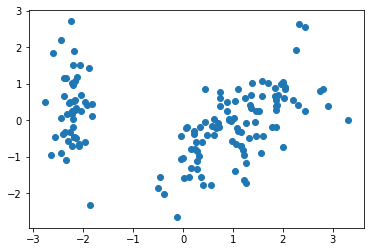

In [101]:
final = pd.DataFrame(data = B)
plt.scatter(final[0],final[1]);

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)